### Task 1
Load the data into a DataFrame and drop the rows with missing values in the following retained columns:
Cylinders
Kerb_Weight
Make
Displacement
Fuel_Tank_Capacity_gallon
City_Mileage_miles_gallon
Highway_Mileage_miles_gallon
Power
Torque

In [50]:
import pandas as pd
import statistics as st 
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

car_df= pd.read_csv('DS1_C4_S5_Car_Data_Challenge.csv')
car_df



,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1271,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [51]:
# create a new df with important columns
new_car= car_df[['Make','Kerb_Weight','Displacement','Cylinders','City_Mileage_km_litre','Highway_Mileage_km_litre','Fuel_Tank_Capacity_litre','Torque', 'Power']]
new_car               

,Make,Kerb_Weight,Displacement,Cylinders,City_Mileage_km_litre,Highway_Mileage_km_litre,Fuel_Tank_Capacity_litre,Torque,Power
0,Tata,660 kg,624.0,2.0,23.60,NaN,24.0,51Nm@4000rpm,38PS@5500rpm
1,Tata,725 kg,624.0,2.0,23.60,NaN,24.0,51Nm@4000rpm,38PS@5500rpm
2,Tata,710 kg,624.0,2.0,NaN,NaN,15.0,51Nm@4000rpm,38PS@5500rpm
3,Tata,725 kg,624.0,2.0,23.60,NaN,24.0,51Nm@4000rpm,38PS@5500rpm
4,Tata,725 kg,624.0,2.0,23.60,NaN,24.0,51Nm@4000rpm,38PS@5500rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,1170 kg,1498.0,4.0,22.60,25.10,40.0,200Nm@1750rpm,100PS@3600rpm
1271,Honda,1175 kg,1498.0,4.0,22.60,25.10,40.0,200Nm@1750rpm,100PS@3600rpm
1272,Honda,1107 kg,1497.0,4.0,18.00,18.00,40.0,145Nm@4600rpm,119PS@6600rpm
1273,Honda,1080 kg,1497.0,4.0,14.30,16.40,40.0,145Nm@4600rpm,119PS@6600rpm


In [52]:
missing_values= new_car.isnull().sum()  # identify the sum of missing values
print(missing_values)

Make                         75
Kerb_Weight                 365
Displacement                 12
Cylinders                    66
City_Mileage_km_litre       555
Highway_Mileage_km_litre    799
Fuel_Tank_Capacity_litre     69
Torque                        2
Power                         0
dtype: int64


In [54]:

# drop the rows with missing values for the following columns
#This will modify the original DataFrame
new_car.dropna(subset=['Power','Cylinders','Kerb_Weight','Make','Displacement','Fuel_Tank_Capacity_litre',
                 'City_Mileage_km_litre','Highway_Mileage_km_litre','Torque'],inplace=True)



In [58]:
empty_values= new_car.isnull().sum() # check if the missing values are dropped 
print(empty_values)


Make                        0
Kerb_Weight                 0
Displacement                0
Cylinders                   0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Fuel_Tank_Capacity_litre    0
Torque                      0
Power                       0
dtype: int64


In [60]:
new_car 

,Make,Kerb_Weight,Displacement,Cylinders,City_Mileage_km_litre,Highway_Mileage_km_litre,Fuel_Tank_Capacity_litre,Torque,Power
24,Maruti Suzuki,920 kg,1196.0,4.0,12.00,15.00,40.0,101Nm@3000rpm,73PS@6000rpm
25,Maruti Suzuki,940 kg,1196.0,4.0,12.00,15.00,40.0,101Nm@3000rpm,74PS@6000RPM
26,Maruti Suzuki,928 kg,1196.0,4.0,11.00,15.00,40.0,101Nm@3000rpm,73PS@6000rpm
29,Maruti Suzuki,745 kg,998.0,3.0,14.00,17.00,35.0,90Nm@3500rpm,68PS@6000rpm
30,Maruti Suzuki,750 kg,998.0,3.0,14.00,17.00,35.0,90Nm@3500rpm,68PS@6200rpm
...,...,...,...,...,...,...,...,...,...
1270,Honda,1170 kg,1498.0,4.0,22.60,25.10,40.0,200Nm@1750rpm,100PS@3600rpm
1271,Honda,1175 kg,1498.0,4.0,22.60,25.10,40.0,200Nm@1750rpm,100PS@3600rpm
1272,Honda,1107 kg,1497.0,4.0,18.00,18.00,40.0,145Nm@4600rpm,119PS@6600rpm
1273,Honda,1080 kg,1497.0,4.0,14.30,16.40,40.0,145Nm@4600rpm,119PS@6600rpm


### Task 2 
Preprocess the data in the following columns as specified:

Kerb_Weight: Remove "kg" and ensure the column is numerical. Convert the weight in kilograms to pounds by multiplying each value in the column by the number 2.2.
Power: Sample data = 38PS@5500rpm
All entries in the "Power" column should contain only the number 38 after cleaning the dataset in the preprocessing stage.
Torque: Sample data = 51Nm@4000rpm
The "Torque" column must contain only the number 51 after cleaning the dataset in the preprocessing stage. Perform this operation on all entries in the column and ensure the column is converted to the numerical type.

In [62]:
x=new_car['Kerb_Weight'].dtype
print(x)

object


In [63]:
# Replace "kg" with empty string
new_car['Kerb_Weight'] = new_car['Kerb_Weight'].str.replace("kg", "")
new_car['Kerb_Weight_LB']= new_car['Kerb_Weight'].astype({'Kerb_Weight':float})*2.2
new_car['Kerb_Weight_LB']

24      2024.0
25      2068.0
26      2041.6
29      1639.0
30      1650.0
         ...  
1270    2574.0
1271    2585.0
1272    2435.4
1273    2376.0
1274    5137.0
Name: Kerb_Weight_LB, Length: 316, dtype: float64

In [64]:
# Code for cleaning the power column 
print("Before cleaning")
new_car.head()

# Regular expression used for cleaning the Power column 
new_car["Power"] = new_car["Power"].str.strip () # stripping white spaces if any 
new_car['Power'] = new_car['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True).astype(float)
new_car['Power']
                 

Before cleaning


24       73.0
25       74.0
26       73.0
29       68.0
30       68.0
        ...  
1270    100.0
1271    100.0
1272    119.0
1273    119.0
1274    202.0
Name: Power, Length: 316, dtype: float64

In [65]:
# code for cleaning the torque column 

# Regular expression used for cleaning the Power column 
new_car["Torque"] = new_car["Torque"].str.strip() # stripping white spaces if any 
new_car['Torque'] = new_car['Torque'].str.replace(r"-",'', regex=True) # Removing any occurances of "-" in this the column
new_car['Torque'] = new_car['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True).astype(float)
new_car['Torque'].astype(float)

24      101.0
25      101.0
26      101.0
29       90.0
30       90.0
        ...  
1270    200.0
1271    200.0
1272    145.0
1273    145.0
1274    441.0
Name: Torque, Length: 316, dtype: float64

In [68]:
new_car 

,Make,Kerb_Weight,Displacement,Cylinders,City_Mileage_km_litre,Highway_Mileage_km_litre,Fuel_Tank_Capacity_litre,Torque,Power,Kerb_Weight_LB
24,Maruti Suzuki,920,1196.0,4.0,12.00,15.00,40.0,101.0,73.0,2024.0
25,Maruti Suzuki,940,1196.0,4.0,12.00,15.00,40.0,101.0,74.0,2068.0
26,Maruti Suzuki,928,1196.0,4.0,11.00,15.00,40.0,101.0,73.0,2041.6
29,Maruti Suzuki,745,998.0,3.0,14.00,17.00,35.0,90.0,68.0,1639.0
30,Maruti Suzuki,750,998.0,3.0,14.00,17.00,35.0,90.0,68.0,1650.0
...,...,...,...,...,...,...,...,...,...,...
1270,Honda,1170,1498.0,4.0,22.60,25.10,40.0,200.0,100.0,2574.0
1271,Honda,1175,1498.0,4.0,22.60,25.10,40.0,200.0,100.0,2585.0
1272,Honda,1107,1497.0,4.0,18.00,18.00,40.0,145.0,119.0,2435.4
1273,Honda,1080,1497.0,4.0,14.30,16.40,40.0,145.0,119.0,2376.0


### Task 3
In each column listed in Task 1, calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer.
In the "Displacement" column, display the distribution for each manufacturer using box plots.

In [74]:
print(new_car.columns)
new_car.info()


Index(['Make', 'Kerb_Weight', 'Displacement', 'Cylinders',
       'City_Mileage_km_litre', 'Highway_Mileage_km_litre',
       'Fuel_Tank_Capacity_litre', 'Torque', 'Power', 'Kerb_Weight_LB'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 24 to 1274
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Make                      316 non-null    object 
 1   Kerb_Weight               316 non-null    object 
 2   Displacement              316 non-null    float64
 3   Cylinders                 316 non-null    float64
 4   City_Mileage_km_litre     316 non-null    float64
 5   Highway_Mileage_km_litre  316 non-null    float64
 6   Fuel_Tank_Capacity_litre  316 non-null    float64
 7   Torque                    316 non-null    float64
 8   Power                     316 non-null    float64
 9   Kerb_Weight_LB            316 non-null    float64
dtypes: float64(8), obje

In [75]:
new_car.Make.unique()


# or make_df=data-['Make'].unique()

array(['Maruti Suzuki', 'Tata', 'Premier', 'Toyota', 'Hyundai',
       'Volkswagen', 'Mahindra', 'Fiat', 'Skoda', 'Audi', 'Dc', 'Jaguar',
       'Bmw', 'Porsche', 'Maserati', 'Bentley', 'Ferrari', 'Icml',
       'Renault', 'Honda', 'Ford', 'Volvo', 'Land Rover Rover',
       'Lamborghini', 'Nissan', 'Aston Martin', 'Mitsubishi'],
      dtype=object)

In [76]:
import pandas as pd
import statistics as st 

for x in new_car['Make'].unique():
    # Instead of dropping columns, select the columns that would be used
    selected_columns = ['Kerb_Weight_LB', 'Cylinders', 'Fuel_Tank_Capacity_litre', 
                        'City_Mileage_km_litre', 'Power', 'Highway_Mileage_km_litre', 'Torque']
    d = new_car[new_car['Make'] == x][selected_columns]
    print(x)
    
    # Calculate mean, median, and standard deviation for each column
    mean = []
    median = []
    Stdev = []
    CofV = []
    
    for col in d.columns:
        ymean = d[col].mean()
        mean.append(ymean)
        
        ymedian = d[col].median()
        median.append(ymedian)
        
        ystd = d[col].std()
        Stdev.append(ystd)
        
        CofV.append(ystd / ymean * 100)
    
    row_n = ['Mean', 'Median', 'Standard Dev', 'C of variation']
    col_n = selected_columns
    
    t3 = pd.DataFrame([mean, median, Stdev, CofV], columns=col_n)
    t3.insert(0, 'Measures', row_n, True)
    print(t3)
    print('\n')


Maruti Suzuki
         Measures  Kerb_Weight_LB  Cylinders  Fuel_Tank_Capacity_litre  \
0            Mean     1976.400000   3.431818                 38.477273   
1          Median     1782.000000   3.000000                 35.000000   
2    Standard Dev      341.707488   0.501056                  5.359142   
3  C of variation       17.289389  14.600306                 13.928071   

   City_Mileage_km_litre      Power  Highway_Mileage_km_litre      Torque  
0              18.765455  72.509091                 20.671818  115.886364  
1              20.000000  68.000000                 22.000000   90.000000  
2               4.388711  13.470188                  3.330682   47.035966  
3              23.387182  18.577240                 16.112187   40.588008  


Tata
         Measures  Kerb_Weight_LB  Cylinders  Fuel_Tank_Capacity_litre  \
0            Mean     2869.826667   3.566667                 44.133333   
1          Median     2490.400000   4.000000                 44.000000   
2    S

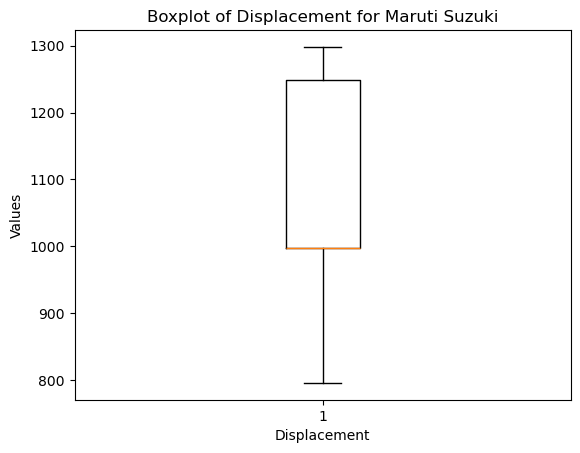

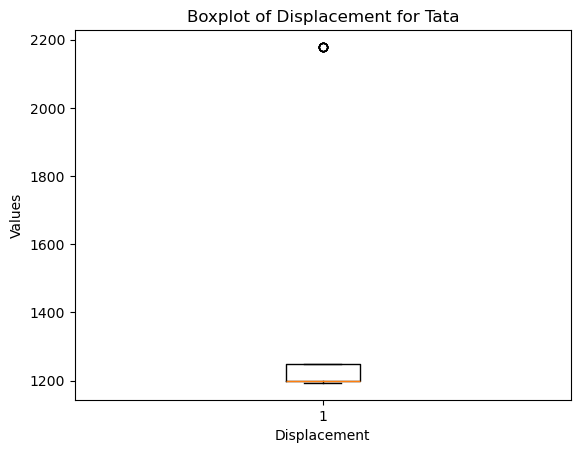

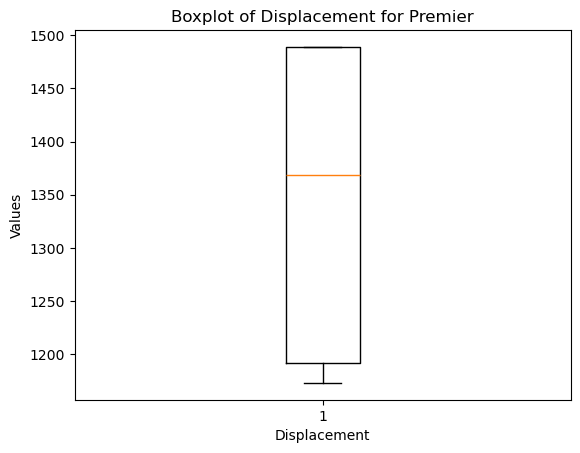

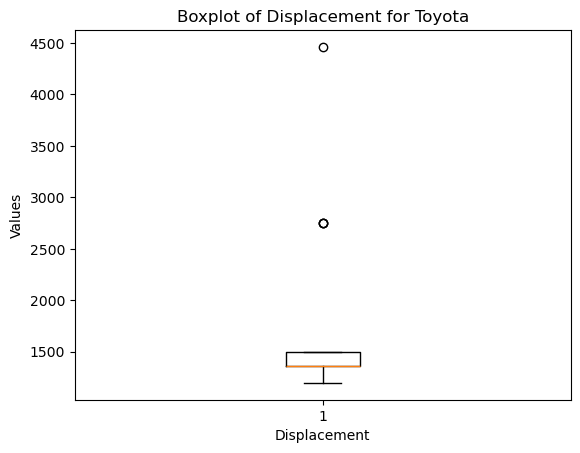

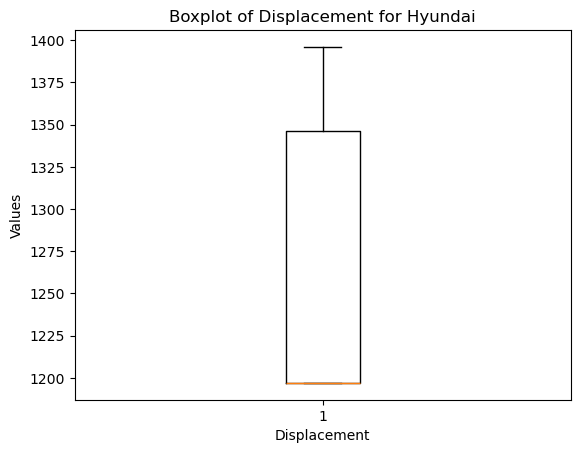

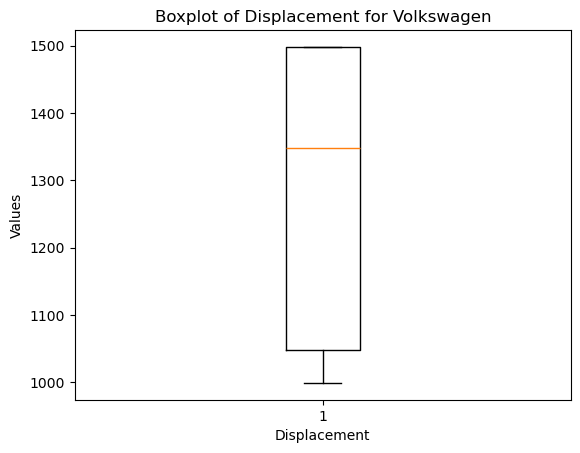

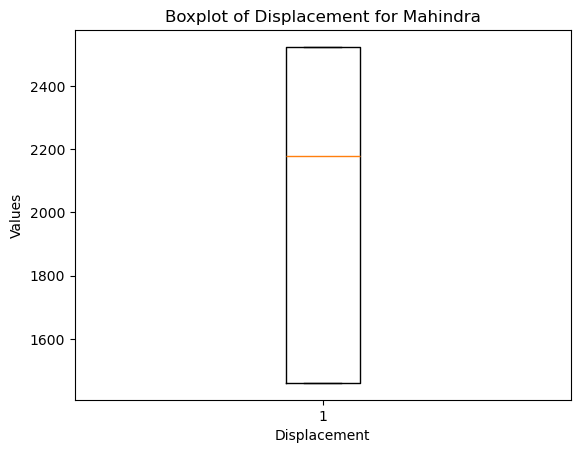

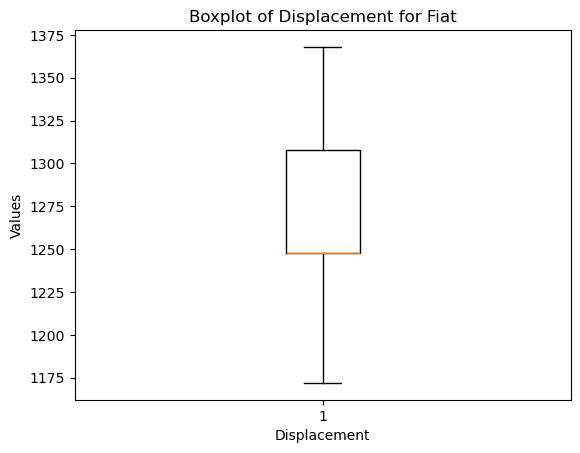

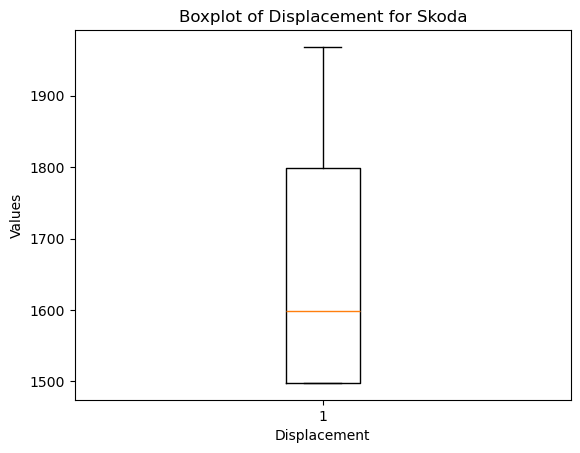

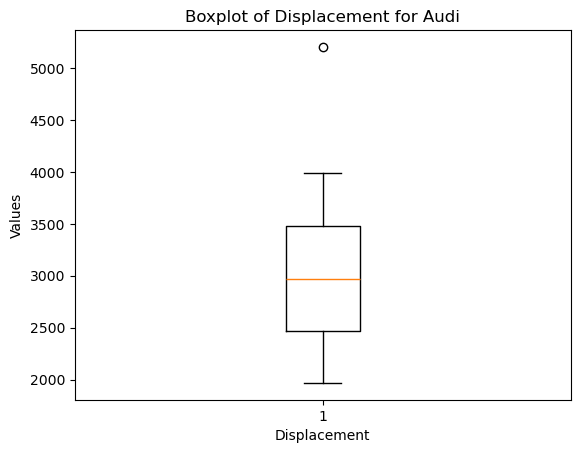

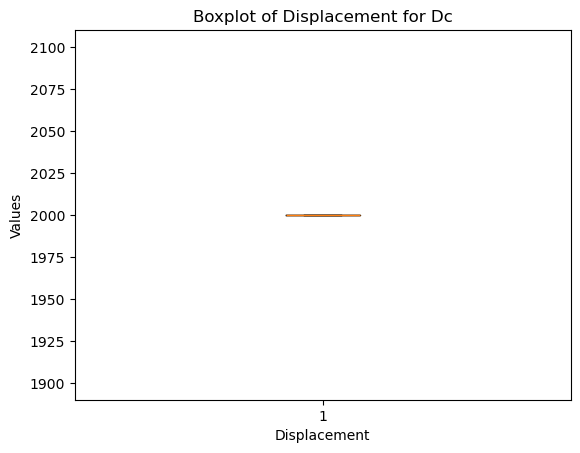

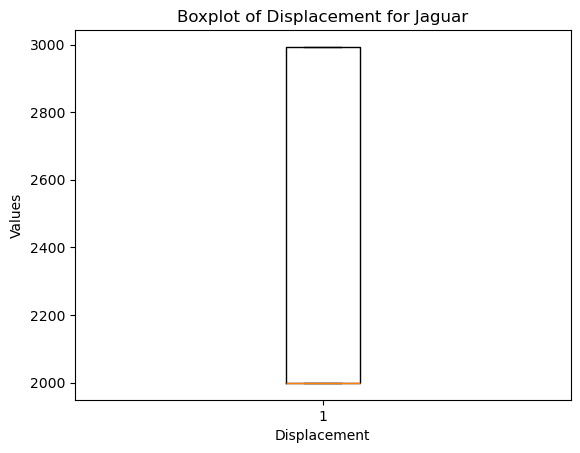

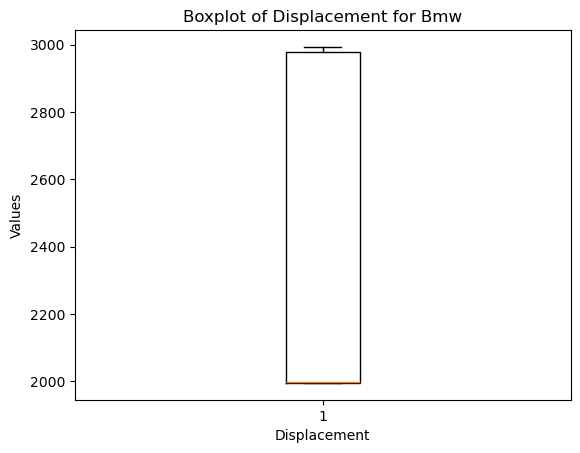

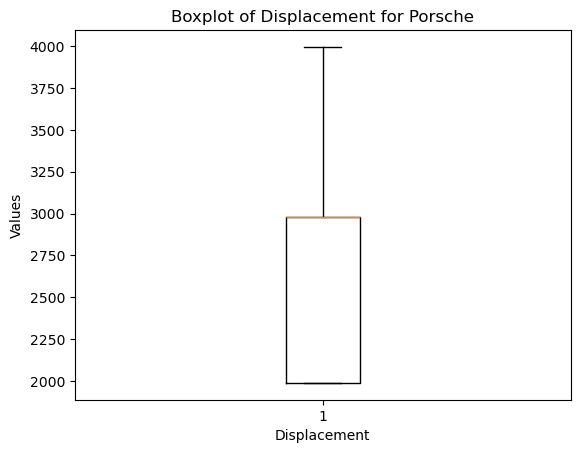

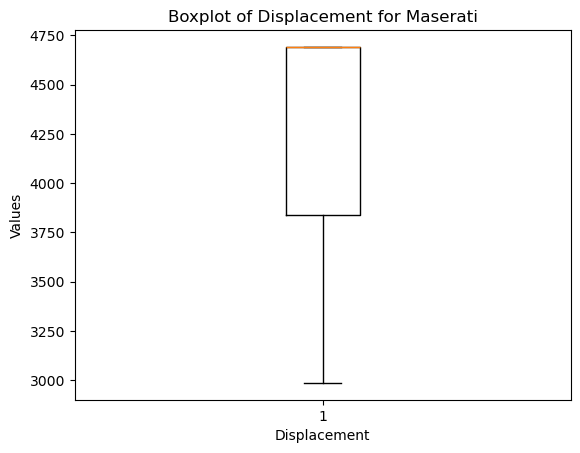

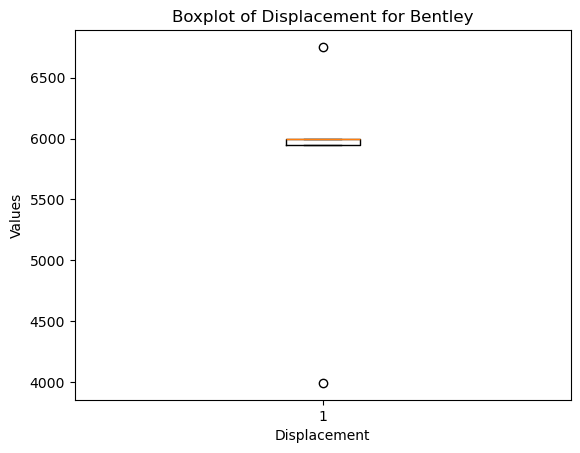

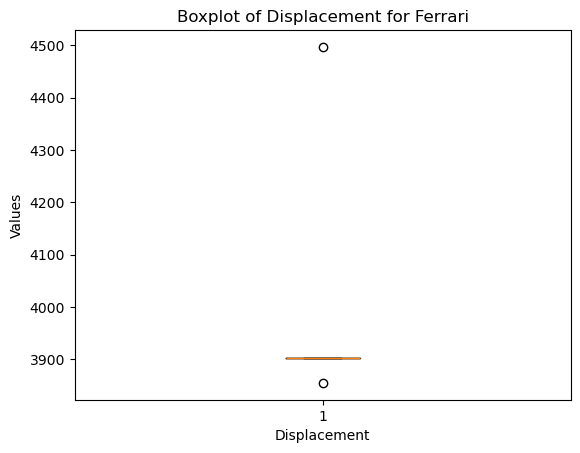

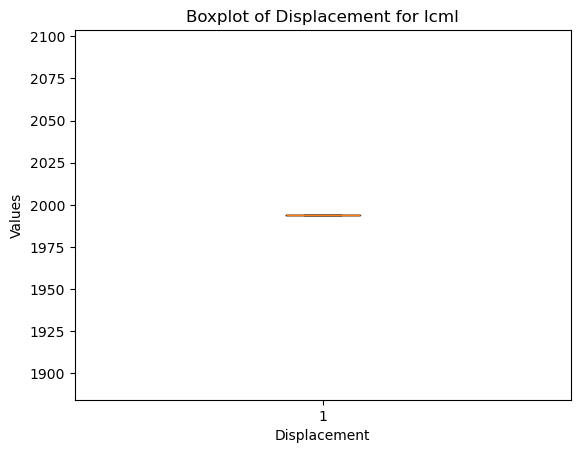

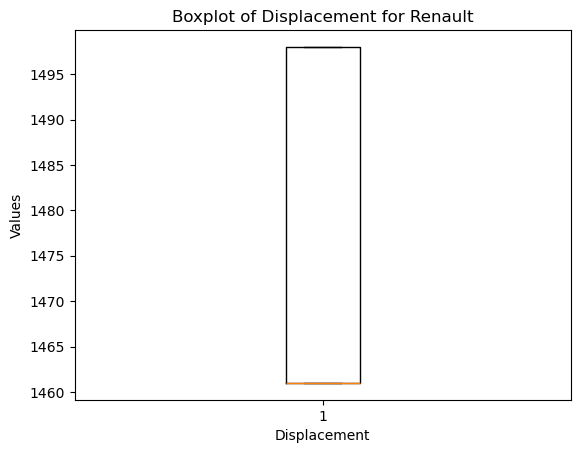

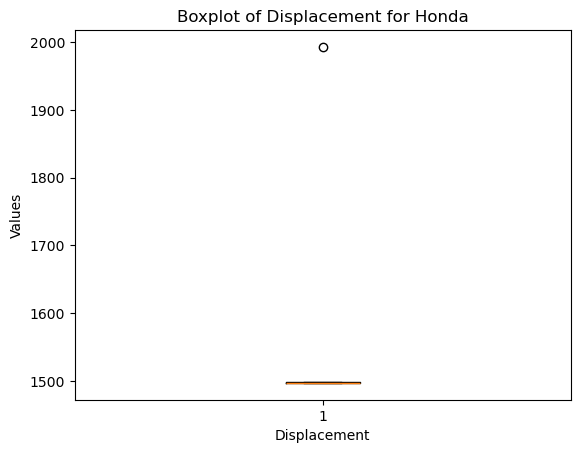

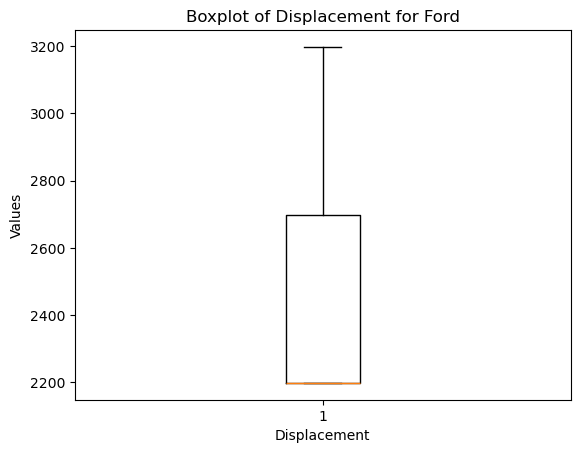

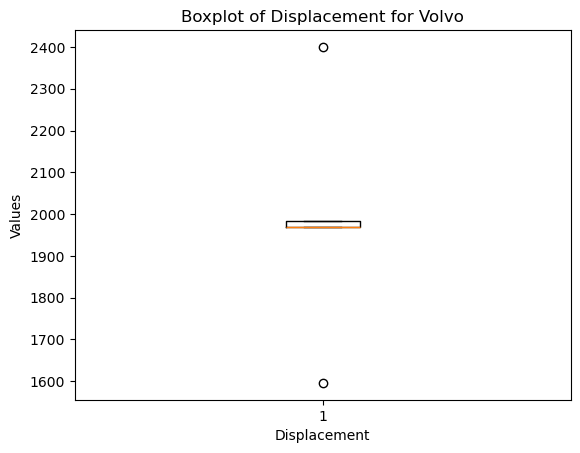

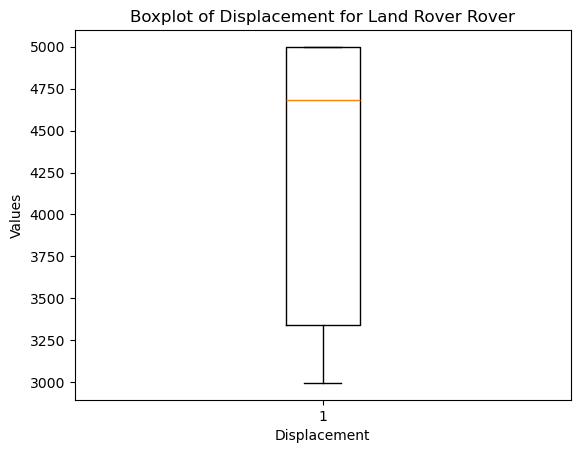

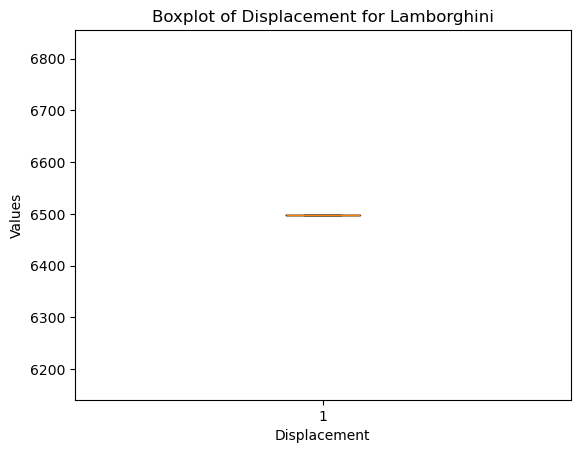

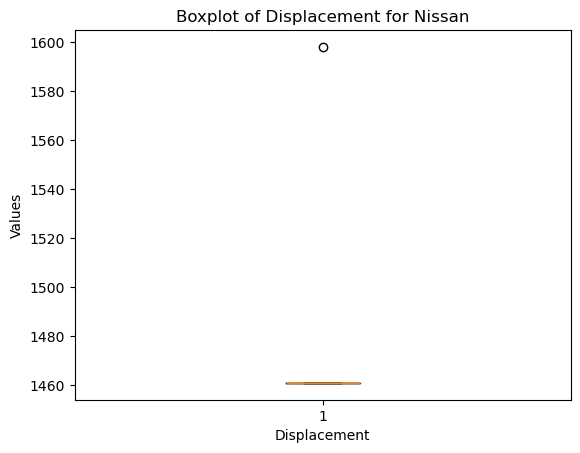

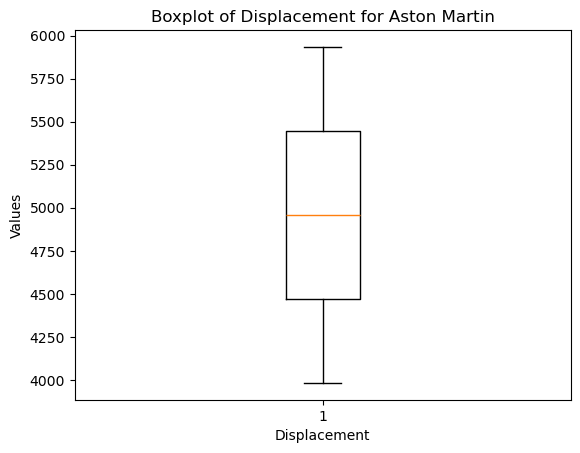

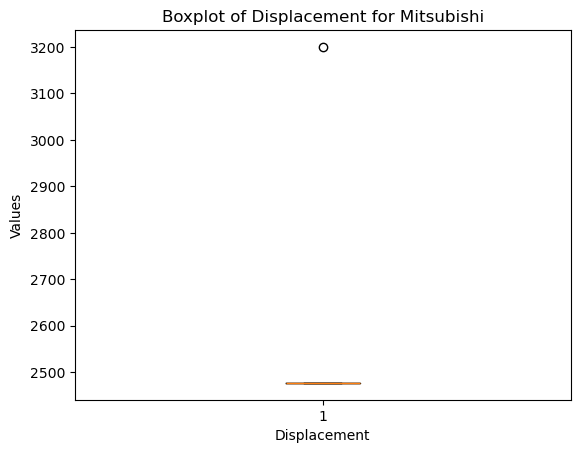

In [77]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

for x in new_car['Make'].unique():
    
    # Instead of dropping columns, select the columns that would be used
    selected_column = ['Displacement']
    p = new_car[new_car['Make'] == x][selected_column].values
    
    plt.boxplot(p)
    plt.title(f"Boxplot of Displacement for {x}")
    plt.xlabel("Displacement")
    plt.ylabel("Values")
    plt.show()


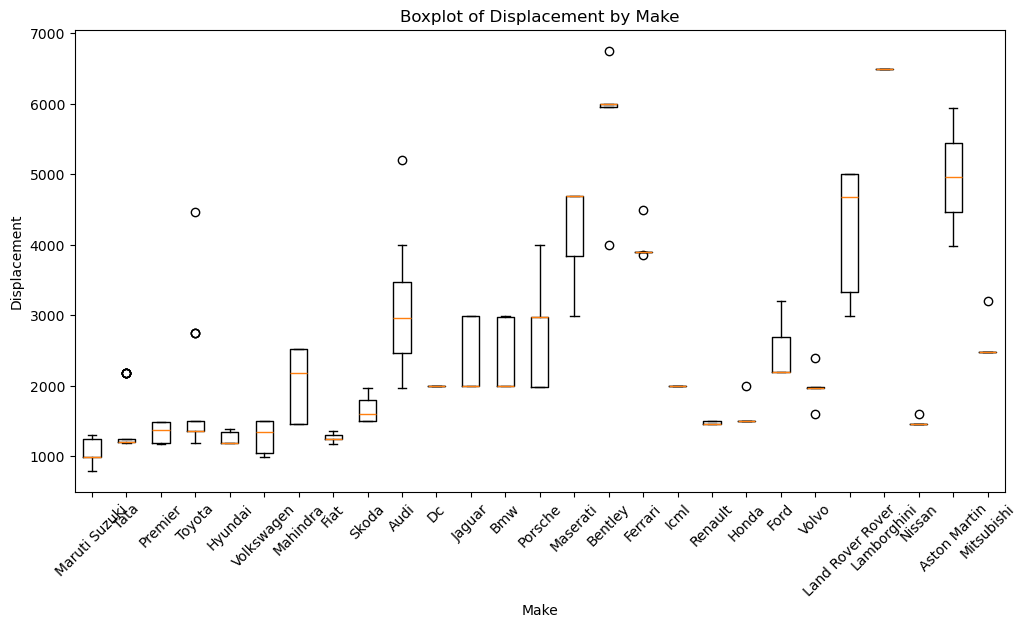

In [78]:
#or another alternative to combine all the make into one boxplot

import matplotlib.pyplot as plt

# Prepare data for each make 
d = [new_car[new_car['Make'] == x]['Displacement'].values for x in new_car['Make'].unique()]


m = new_car['Make'].unique()

# Plot boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(d, labels=m)
plt.title("Boxplot of Displacement by Make")
plt.xlabel("Make")
plt.ylabel("Displacement")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


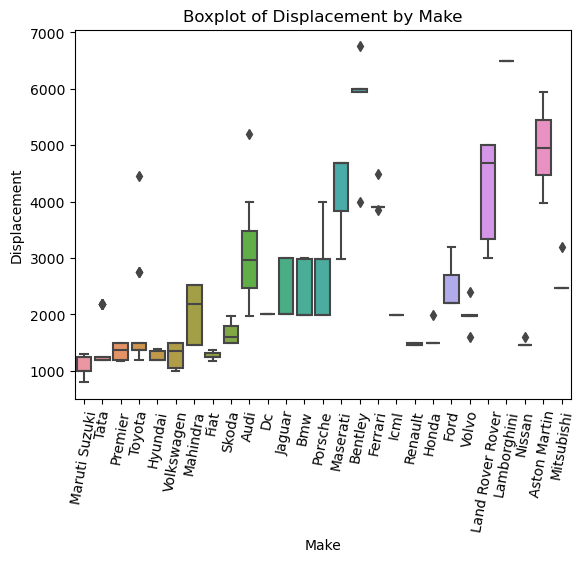

In [82]:
# or to have all the cars in one boxplot using seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Create a new DataFrame containing only the 'Make' and 'Displacement' columns
x= new_car[['Make', 'Displacement']]

# Plot a boxplot for 'Displacement' for each 'Make' on the same plot
#plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Displacement', data=x)
plt.title("Boxplot of Displacement by Make")
plt.xlabel("Make")
plt.ylabel("Displacement")
plt.xticks(rotation=80)
#Rotate x-axis labels for better readability
plt.show()


### Task 4
Identify at least three features that affect the mileage (using correlation analysis) of the cars of the following manufactures and visually represent them using the appropriate types of charts/graphs in Python:
Renault
Toyota
Honda
Illustrate with justification if these factors positively or negatively affect the mileage of a car.

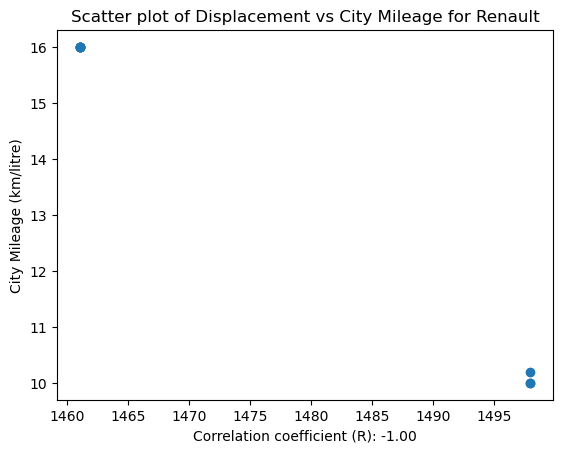

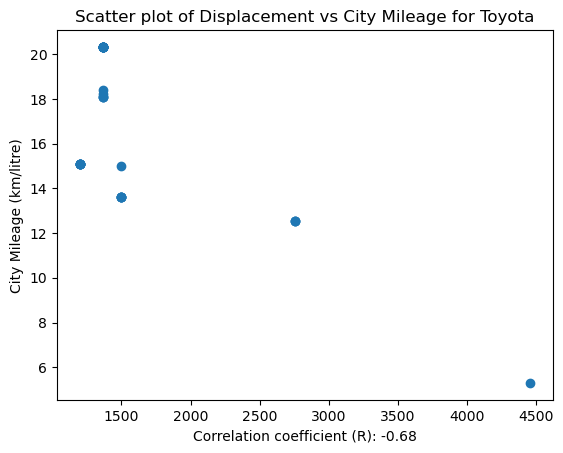

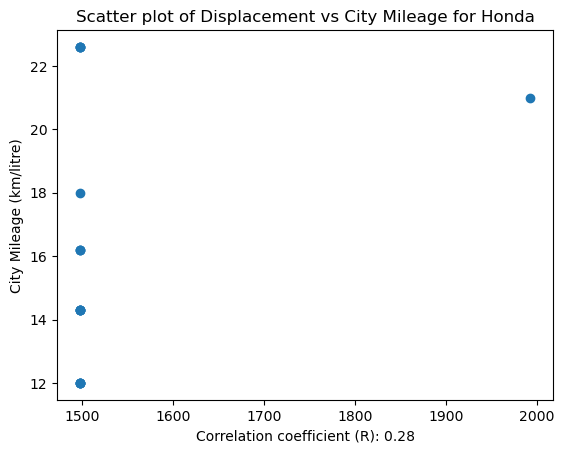

In [91]:
makes = ['Renault', 'Toyota', 'Honda']

for x in makes:
    d = new_car[new_car['Make'] == x]['Displacement'].values
    m = new_car[new_car['Make'] == x]['City_Mileage_km_litre'].values
    
    # or 
    #d = new_car[new_car.Make == x]['Displacement']
    #m = new_car[new_car.Make == x]['City_Mileage_km_litre']

 # Calculate the correlation coefficient

    corr = np.corrcoef(d, m)[0, 1]

 # Plot the scatter plot

    plt.scatter(d, m)  # Use d and m instead of x and y
    plt.title(f"Scatter plot of Displacement vs City Mileage for {x}")
    plt.xlabel("Displacement")
    plt.ylabel("City Mileage (km/litre)")
    
    plt.xlabel(f"Correlation coefficient (R): {corr:.2f}")  # Display the correlation coefficient
    plt.show()



In [ ]:
makes = ['Renault', 'Toyota', 'Honda']

for x in makes:
    d = new_car[new_car['Make'] == x]['Displacement'].values
    m = new_car[new_car['Make'] == x]['City_Mileage_km_litre'].values
    
    # or 
    #d = new_car[new_car.Make == x]['Displacement']
    #m = new_car[new_car.Make == x]['City_Mileage_km_litre']

    plt.scatter(d, m)  # Use d and m instead of x and y
    plt.title(f"Scatter plot of Displacement vs City Mileage for {x}")
    
    plt.xlabel("Displacement")
    plt.ylabel("City Mileage (km/litre)")
    
    c= np.corrcoef(d,m)[0,1]
    plt.suptitle(f'R:{c}')

    plt.show()